In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
from pandas.api.types import is_string_dtype, is_numeric_dtype    

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the excel file
data=pd.read_csv("C:\\Users\\yedid\\Downloads\\archive1\\Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# List of numerical and categorical variables
num_list = []
cat_list = []

for column in data:
    if is_numeric_dtype(data[column]):
        num_list.append(column)
    elif is_string_dtype(data[column]):
        cat_list.append(column)
        
print("numeric:", num_list)
print("categorical:", cat_list)

numeric: ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
categorical: ['Genre']


In [6]:
df = data.drop('CustomerID', axis= 1)

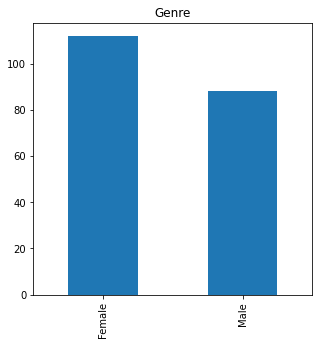

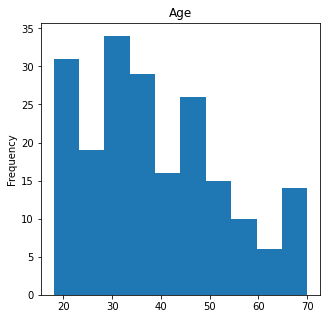

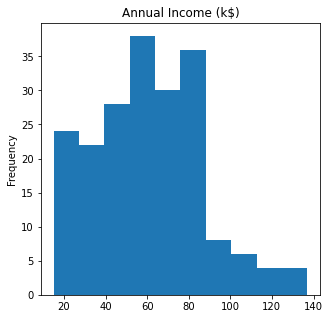

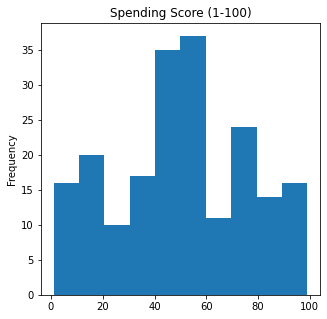

In [7]:
for column in df:
    plt.figure(column, figsize = (5,5))
    plt.title(column)
    if is_numeric_dtype(df[column]):
        df[column].plot(kind= 'hist')
    elif is_string_dtype(df[column]):
        df[column].value_counts()[:10].plot(kind = 'bar')

In [8]:
df = df.drop('Genre', axis = 1)

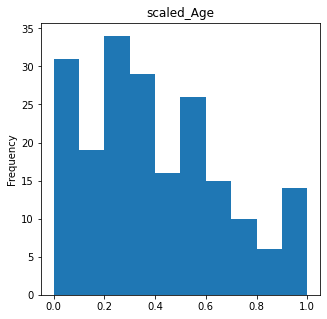

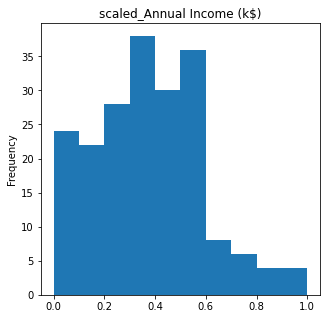

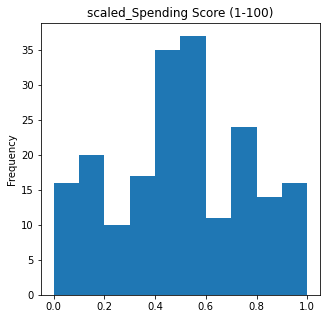

In [9]:
#transform the data into standard scale

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for var in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
    scaled_var = "scaled_" + var
    model = scaler.fit(df[var].values.reshape(-1,1))
    df[scaled_var] = model.transform(df[var].values.reshape(-1,1))
    
    plt.figure(figsize = (5,5))
    plt.title(scaled_var)
    df[scaled_var].plot(kind = 'hist')

2D Scatter Plot

age vs. annual income

annual income vs. spending score

age vs. spending income

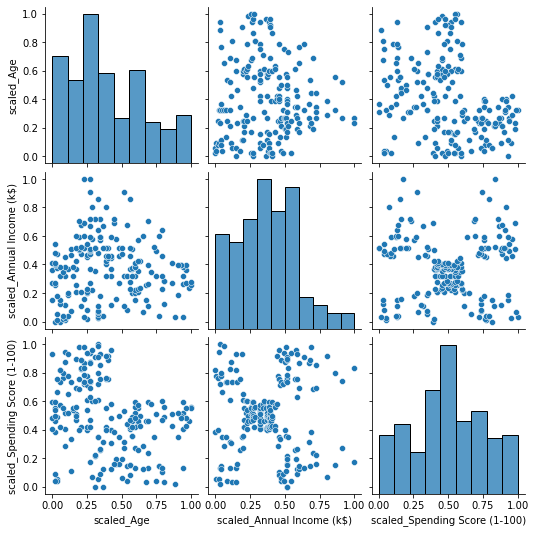

In [10]:
#2D scatter plot

import seaborn as sns
columns = ["scaled_Age","scaled_Annual Income (k$)", "scaled_Spending Score (1-100)"]
sns.pairplot(df[columns])

Text(0.5, 0, 'scaled_Spending Score (1-100)')

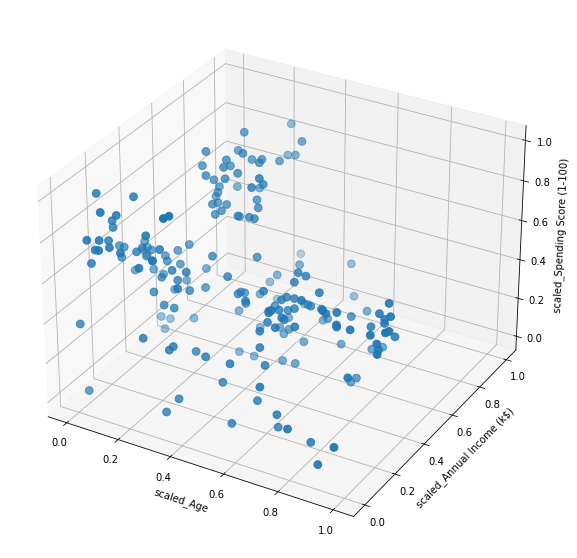

In [11]:
#3D Scatter Plot:
#age vs. annual income vs. spending score

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

axis_list = ["scaled_Age", "scaled_Annual Income (k$)", 'scaled_Spending Score (1-100)']
x, y, z = axis_list

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection = "3d")
sc = ax.scatter(df[x], df[y], df[z], s = 60)
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)

Customer Segmentation

Text(0.5, 1.0, 'Distribution of Gender')

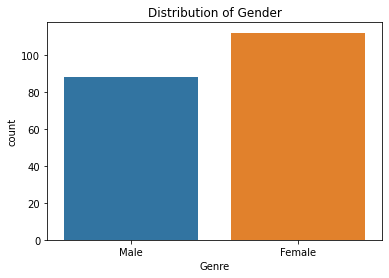

In [12]:
#Distribution of gender to recognize different distributions
sns.countplot(x='Genre', data=data)
plt.title('Distribution of Gender')

Text(0.5, 0, 'Age')

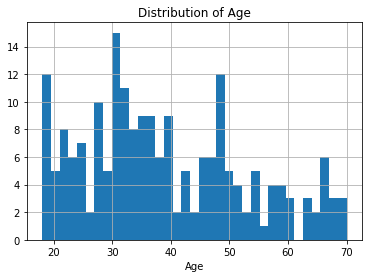

In [13]:
# Histogram of ages
data.hist('Age', bins=35)
plt.title('Distribution of Age')
plt.xlabel('Age')

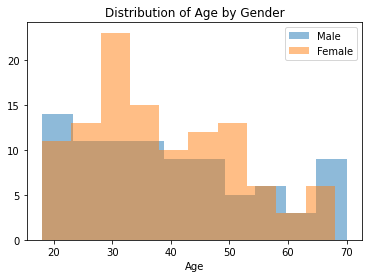

In [14]:
plt.hist('Age', data=data[data['Genre'] == 'Male'], alpha=0.5, label='Male')
plt.hist('Age', data=data[data['Genre'] == 'Female'], alpha=0.5, label='Female')
plt.title('Distribution of Age by Gender')
plt.xlabel('Age')
plt.legend()

Text(0.5, 0, 'Thousands of Dollars')

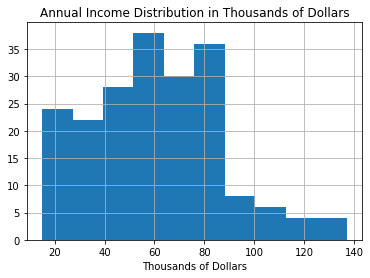

In [15]:
data.hist('Annual Income (k$)')
plt.title('Annual Income Distribution in Thousands of Dollars')
plt.xlabel('Thousands of Dollars')

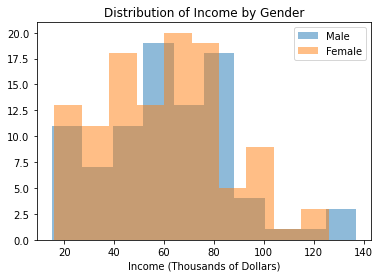

In [16]:
# Histogram of income by gender
plt.hist('Annual Income (k$)', data=data[data['Genre'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Annual Income (k$)', data=data[data['Genre'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Income by Gender');
plt.xlabel('Income (Thousands of Dollars)');
plt.legend();

In [17]:
# Created data sets by gender to save time in the future since gender seems to significantly impact other variables
male_customers = data[data['Genre'] == 'Male']
female_customers = data[data['Genre'] == 'Female']

# Average spending score for men and women
print(male_customers['Spending Score (1-100)'].mean())
print(female_customers['Spending Score (1-100)'].mean())

48.51136363636363
51.526785714285715


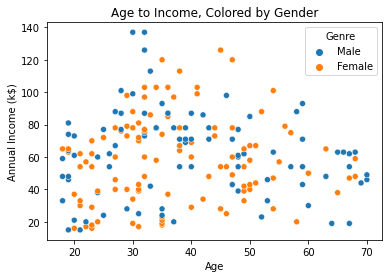

In [18]:
sns.scatterplot('Age', 'Annual Income (k$)', hue='Genre', data=data);
plt.title('Age to Income, Colored by Gender');

<AxesSubplot:>

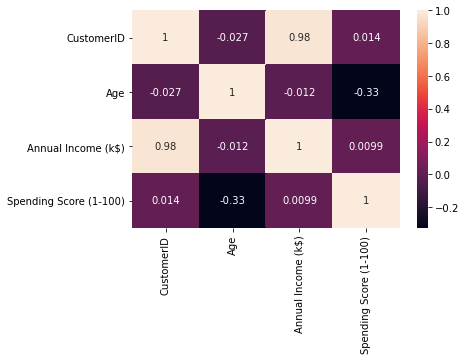

In [19]:
sns.heatmap(data.corr(), annot=True)

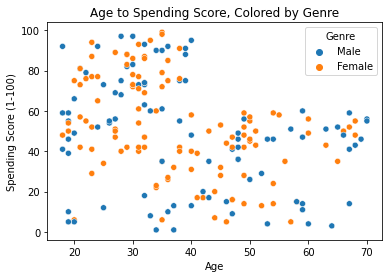

In [20]:
sns.scatterplot('Age', 'Spending Score (1-100)', hue='Genre', data=data);
plt.title('Age to Spending Score, Colored by Genre');

Text(0.5, 1.0, 'Correlation Heatmap - Female')

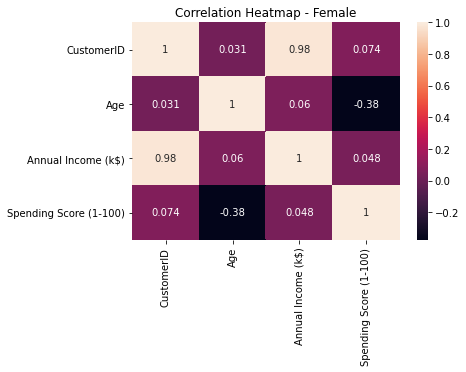

In [21]:
sns.heatmap(female_customers.corr(), annot=True);
plt.title('Correlation Heatmap - Female')

Text(0.5, 1.0, 'Correlation Heatmap - Male')

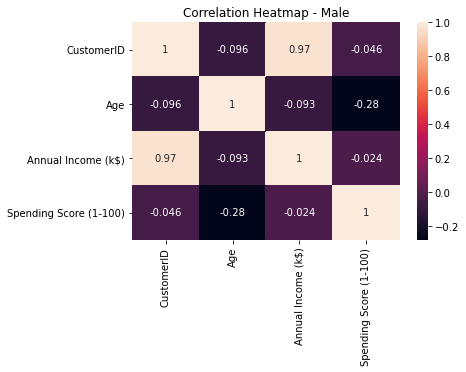

In [22]:
sns.heatmap(male_customers.corr(), annot=True);
plt.title('Correlation Heatmap - Male')

Text(0.5, 1.0, 'Age to Spending Score, Female Only')

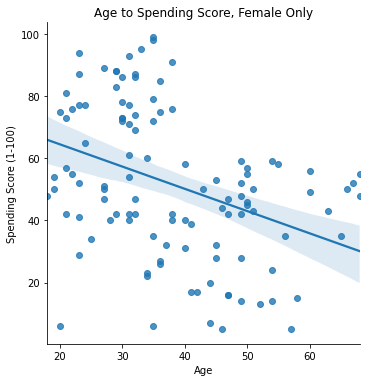

In [23]:
sns.lmplot('Age', 'Spending Score (1-100)', data=female_customers);
plt.title('Age to Spending Score, Female Only')

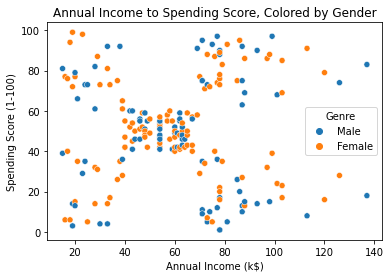

In [24]:
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', hue='Genre', data=data);
plt.title('Annual Income to Spending Score, Colored by Gender');